In [ ]:
## Installing required libraries

In [27]:
!pip install numpy pandas scikit-learn seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading Dataset

In [29]:
data = pd.read_csv('housing.csv')
# from google.colab import files


# uploaded = files.upload()

In [30]:
# import io

# data = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [31]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Data Preprocessing

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
data.dropna(inplace = True)

In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [35]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis =1)
y = data['median_house_value']


In [36]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [37]:
train_data = X_train.join(y_train)

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12750,-121.38,38.62,34.0,2352.0,610.0,1127.0,592.0,2.2000,INLAND,116500.0
4368,-118.27,34.11,41.0,4138.0,1130.0,1859.0,1030.0,2.9780,<1H OCEAN,306800.0
18944,-122.04,38.28,25.0,3304.0,493.0,1464.0,488.0,5.2527,INLAND,130600.0
15503,-117.25,33.08,13.0,3651.0,465.0,1311.0,435.0,7.5402,NEAR OCEAN,340300.0
7933,-118.07,33.82,27.0,3481.0,576.0,1660.0,560.0,5.7965,<1H OCEAN,228200.0
...,...,...,...,...,...,...,...,...,...,...
4727,-118.37,34.06,52.0,2402.0,506.0,878.0,464.0,4.0217,<1H OCEAN,500001.0
616,-122.15,37.74,52.0,1394.0,223.0,545.0,230.0,3.9500,NEAR BAY,219000.0
13125,-121.35,38.28,17.0,2756.0,557.0,1986.0,530.0,3.2234,INLAND,82000.0
19311,-122.89,38.38,16.0,2017.0,369.0,931.0,336.0,5.7664,<1H OCEAN,267500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

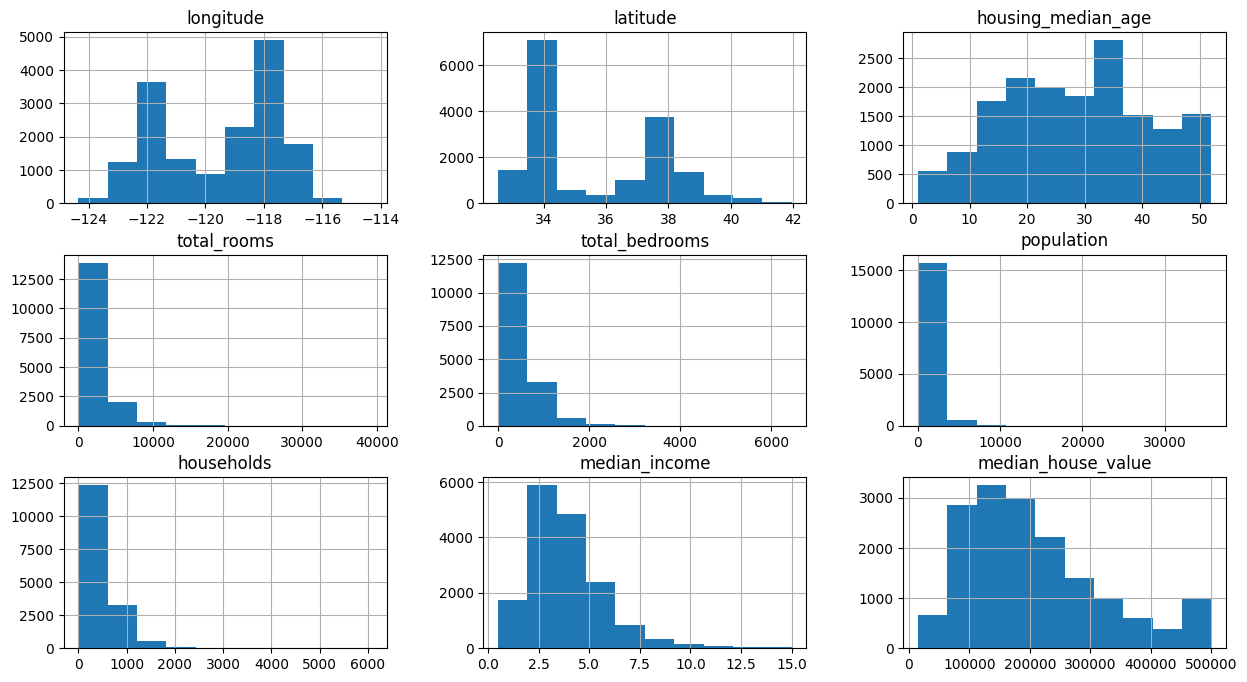

In [39]:
train_data.hist(figsize = (15,8))

In [40]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925475,-0.113026,0.039901,0.066219,0.096774,0.053115,-0.018225,-0.054305
latitude,-0.925475,1.000000,0.017806,-0.030234,-0.062624,-0.104631,-0.067658,-0.076371,-0.135440
housing_median_age,-0.113026,0.017806,1.000000,-0.360101,-0.319975,-0.295598,-0.302790,-0.115498,0.108244
total_rooms,0.039901,-0.030234,-0.360101,1.000000,0.930407,0.857207,0.918312,0.189745,0.126905
total_bedrooms,0.066219,-0.062624,-0.319975,0.930407,1.000000,0.876880,0.979462,-0.013919,0.045320
population,0.096774,-0.104631,-0.295598,0.857207,0.876880,1.000000,0.906522,-0.000378,-0.030452
households,0.053115,-0.067658,-0.302790,0.918312,0.979462,0.906522,1.000000,0.006782,0.059777
median_income,-0.018225,-0.076371,-0.115498,0.189745,-0.013919,-0.000378,0.006782,1.000000,0.686854
median_house_value,-0.054305,-0.135440,0.108244,0.126905,0.045320,-0.030452,0.059777,0.686854,1.000000


<Axes: >

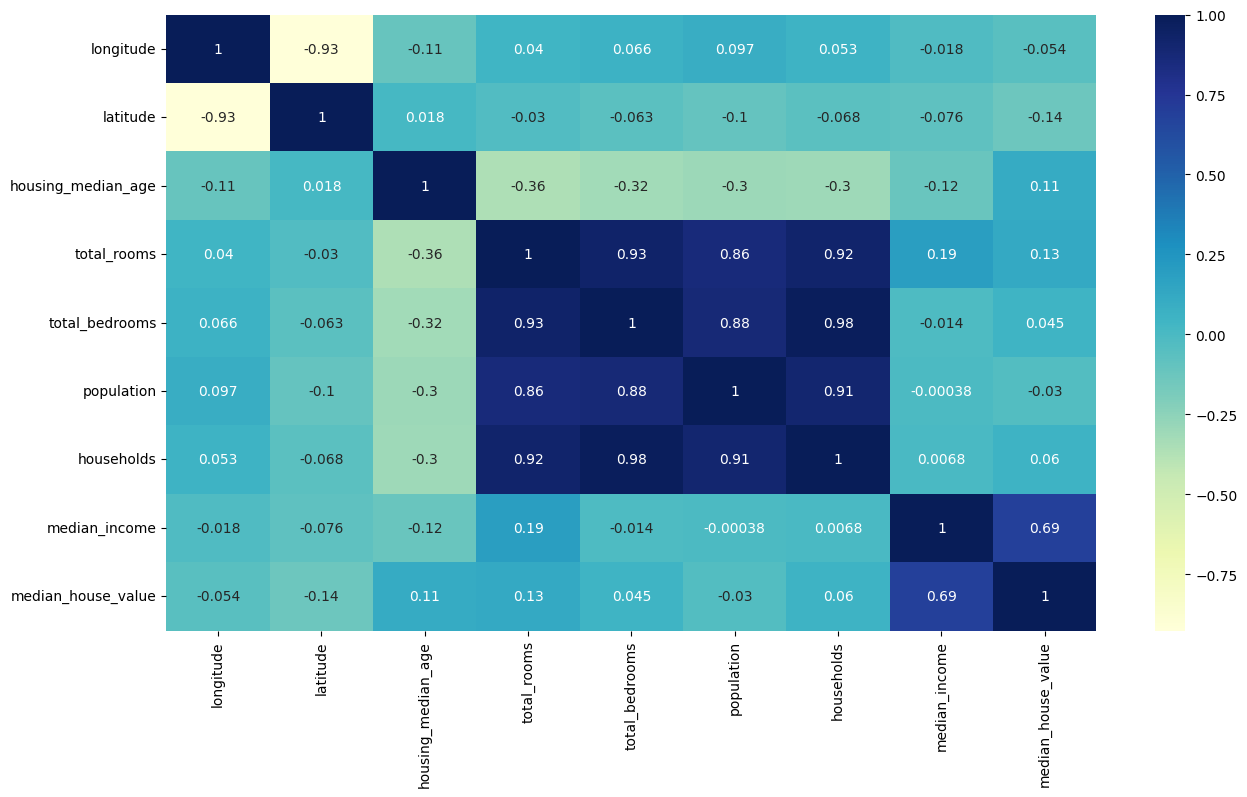

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True,cmap = "YlGnBu")

In [42]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

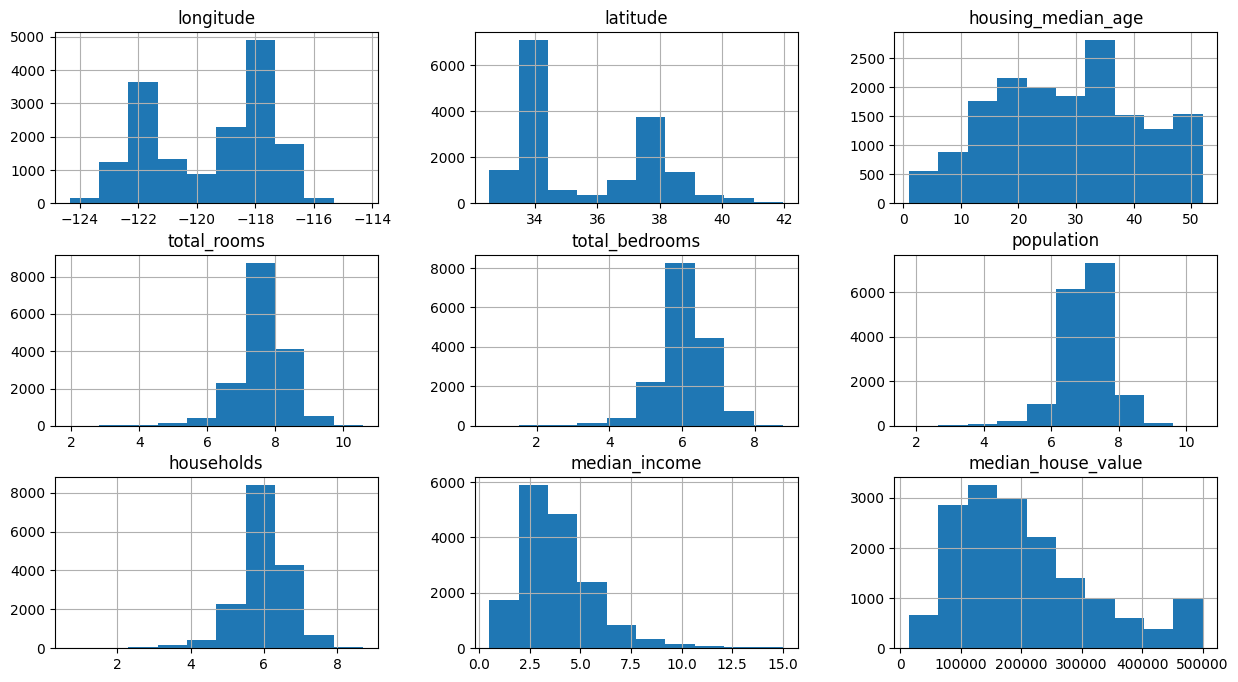

In [43]:
train_data.hist(figsize = (15,8))

In [44]:
# pd.get_dummies(train_data.ocean_proximity)
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5143
NEAR OCEAN    2097
NEAR BAY      1829
ISLAND           3
Name: count, dtype: int64

In [45]:
pd.get_dummies(train_data.ocean_proximity,dtype = int) # one hot encoding

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12750,0,1,0,0,0
4368,1,0,0,0,0
18944,0,1,0,0,0
15503,0,0,0,0,1
7933,1,0,0,0,0
...,...,...,...,...,...
4727,1,0,0,0,0
616,0,0,0,1,0
13125,0,1,0,0,0
19311,1,0,0,0,0


In [46]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype = int)).drop(['ocean_proximity'],axis = 1)

<Axes: >

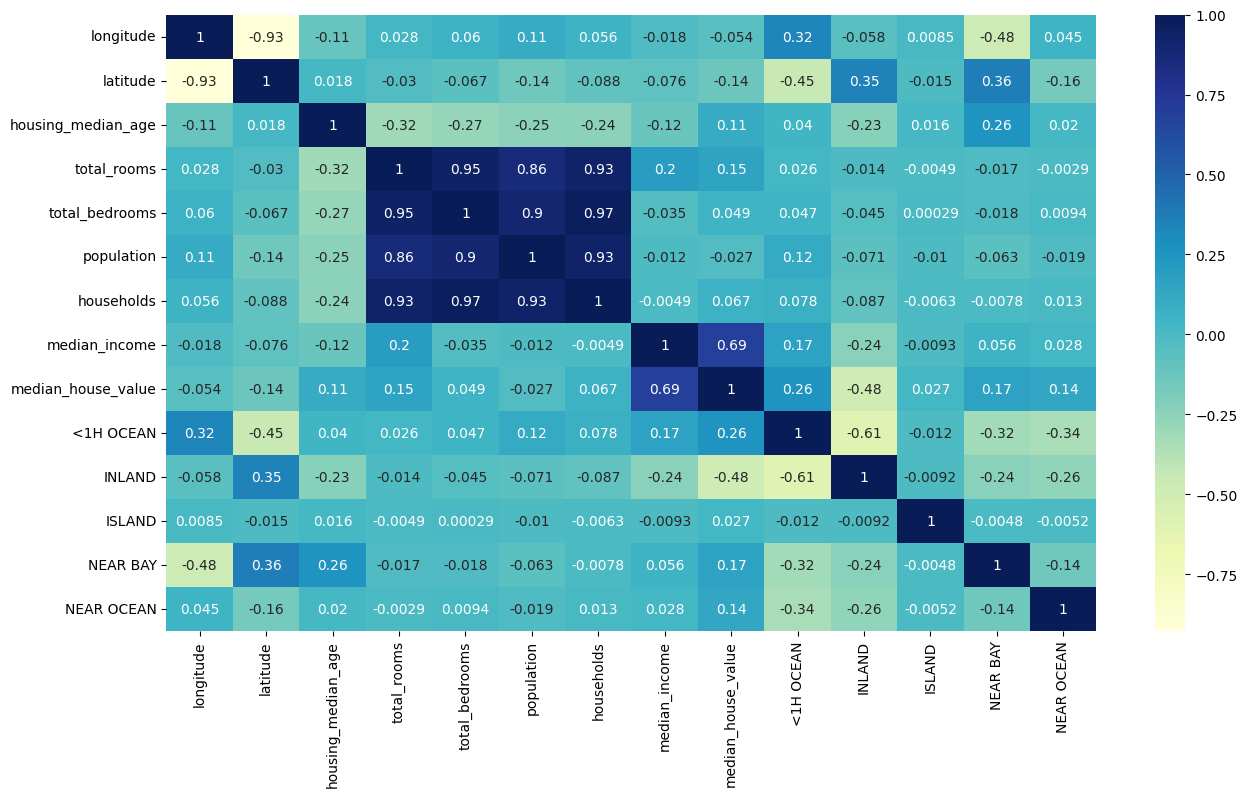

In [47]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True,cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

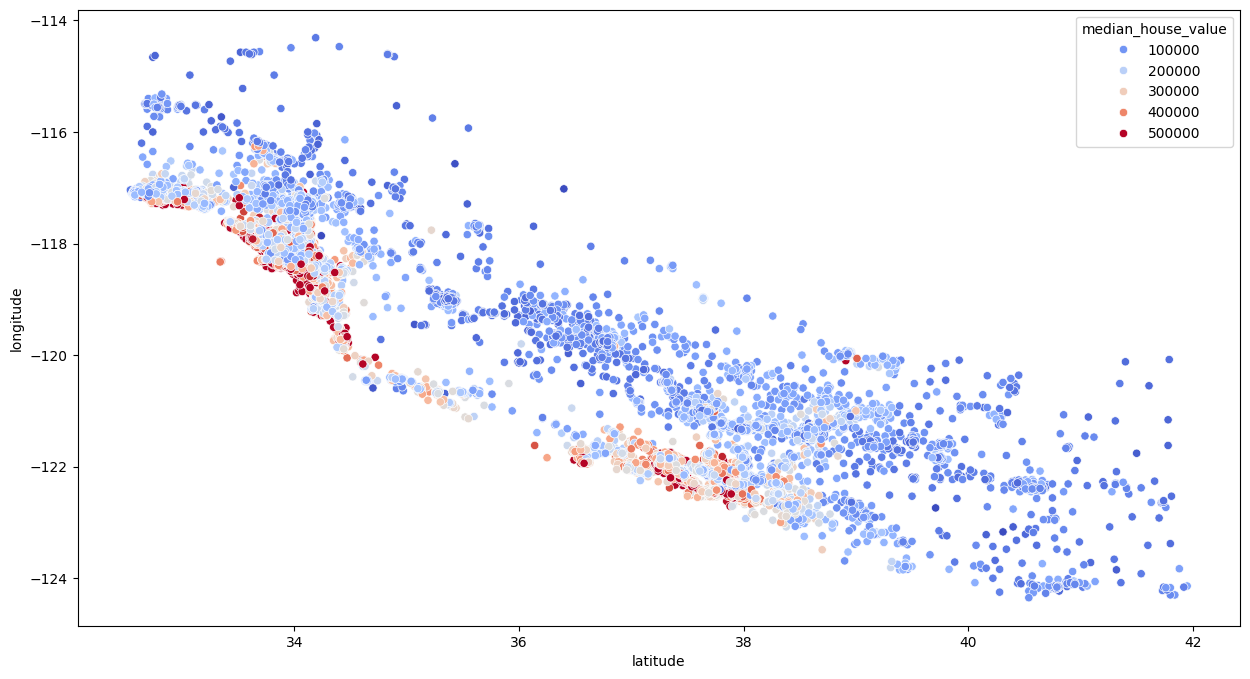

In [48]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude',y='longitude',data = train_data, hue = "median_house_value",palette = 'coolwarm')

In [49]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms']/train_data['households']

<Axes: >

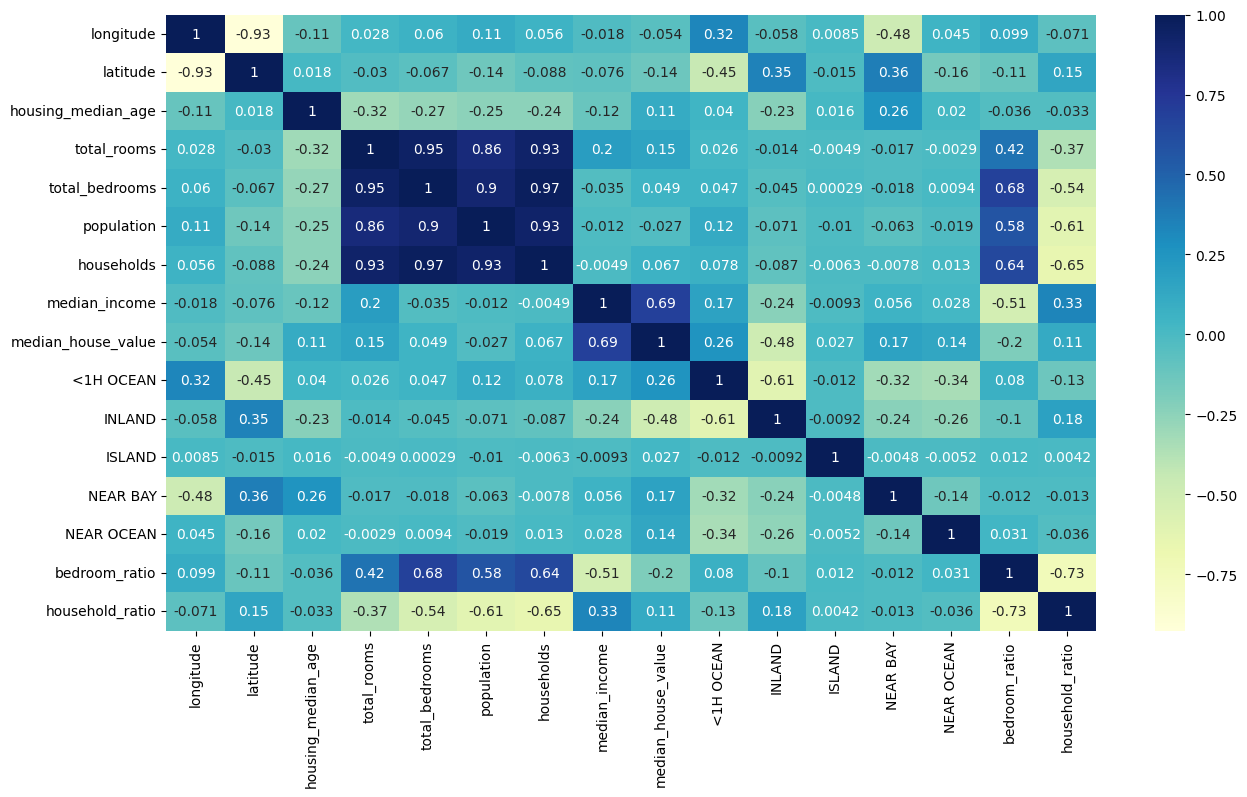

In [50]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True,cmap = "YlGnBu")


In [ ]:
# Model Selection

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis = 1), train_data['median_house_value']

X_train_scaled = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scaled,y_train)
# train_data.info()

# train_data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype = int)).drop(['ocean_proximity'],axis = 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_ratio'] = test_data['total_rooms']/test_data['households']

In [53]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ratio
5113,-118.29,33.96,36.0,7.448916,6.035481,6.805723,5.910797,1.4868,113200.0,1,0,0,0,0,0.810250,1.260222
6321,-117.98,34.00,22.0,8.197814,6.289716,7.585281,6.340359,6.0190,324900.0,1,0,0,0,0,0.767243,1.292957
57,-122.28,37.82,52.0,7.306531,5.817111,6.591674,5.501258,0.8172,85300.0,0,0,0,1,0,0.796152,1.328156
6918,-118.00,33.96,37.0,7.789455,5.780744,6.778785,5.723585,9.1541,453800.0,1,0,0,0,0,0.742124,1.360940
2824,-119.07,35.42,19.0,8.266164,6.725034,7.535297,6.595781,2.6812,107600.0,0,1,0,0,0,0.813562,1.253250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,-118.27,33.82,39.0,7.213768,5.521461,6.638568,5.438079,4.2500,200300.0,1,0,0,0,0,0.765406,1.326529
5218,-118.24,33.95,40.0,7.085064,5.638355,7.099202,5.659482,1.3500,89500.0,1,0,0,0,0,0.795809,1.251893
8311,-118.12,33.77,10.0,8.890824,7.037028,7.835579,6.964136,10.2233,500001.0,0,0,0,0,1,0.791493,1.276659
1458,-121.98,37.97,26.0,7.906547,5.968708,7.117206,6.016157,5.9617,231100.0,0,1,0,0,0,0.754907,1.314219


In [54]:
X_test,y_test = test_data.drop(['median_house_value'],axis = 1), test_data['median_house_value']

In [55]:
X_test_scaled = scaler.transform(X_test)

In [56]:
reg.score(X_test_scaled,y_test)

0.6711670782196244


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
rf.score(X_test_scaled,y_test)

0.8156398114972772

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 8]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_scaled,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [60]:
best_forest = grid_search.best_estimator_

In [61]:
best_forest.score(X_test_scaled,y_test)

0.8127540445956649